# Working with pandas dataframes

## A soft introduction

### Learning objectives
* What is a dataframe?
* Learn basic pandas syntax
* Use dataframe operations to make sense of large datasets
* Manipulte dataframes to answer research questions
* Prepare data for visualizations

In [50]:
#import the pandas library
import pandas as pd
#otter is used for interactive grading
import otter
grader = otter.Notebook()




### What is a dataframe?

A dataframe is a data structure arranged by rows and columns, and containing cells with data (think Excel spreadsheet).


### Why dataframes?

Spreadsheets are error-prone

Large datasets





### Why are they useful?

Dataframes generally a stable format, unlike most excel spreadsheets; changing one cell will likely not affect other cells, and any change to the data is deliberate. It is relatively straightforward to get a subset of the data from a dataframe, with little risk of altering the original. 

### What is pandas?

Pandas is a library, and the industry/academic standard for dataframe operations in Python. 


### Some useful terms
* object
* class
* variable
* method
* attribute

### Reading in data

Much of the data we encounter will be in generic formats like .csv (comma separated values). These generic formats can generally be read into any programming language or spreadsheet software. 

### Example

For the following example we will use a dataset cherry picked from the much larger Storywrangler dataset of Twitter n-grams, `twitter-covid.csv`.

In pandas, the command for reading a csv is `pd.read_csv(filename)`



In [51]:
#The parse_dates argument tells pandas to recognize date strings,
#and turn them into datetime objects
twitter = pd.read_csv('twitter-covid.csv', parse_dates=True)

## The dataset: Twitter ngrams

* ngram - a string of words of characters of length *n*
* ngrams counts collected from 1/10th of Twitter, and ranked for each day
* The dataset contains the top 1 million 1-,2-,and 3-grams
* Here we have a subset of that data containing keywords related to the COVID pandemic

Before we get our hands dirty, let's get a general overview of the data:

In [52]:
#the .head(n) method gives us the first n rows of the dataframe
twitter.head(10)

,date,count,count_no_rt,rank,rank_no_rt,freq,freq_no_rt,odds,odds_no_rt,ngram
0,2010-01-01,564.0,538.0,3327.0,3214.5,0.000020,0.000021,49627.031915,47212.356877,Brazil
1,2010-01-02,703.0,662.0,2899.0,2823.5,0.000025,0.000026,40463.507824,38800.454683,Brazil
2,2010-01-03,655.0,621.0,3342.5,3220.5,0.000021,0.000022,47532.822901,45121.980676,Brazil
3,2010-01-04,577.0,550.0,4034.5,3825.0,0.000017,0.000018,58106.041594,54341.563636,Brazil
4,2010-01-05,634.0,579.0,3721.5,3643.5,0.000019,0.000019,53602.705047,52037.625216,Brazil
5,2010-01-06,845.0,733.0,3107.5,3209.0,0.000024,0.000023,41923.604734,42995.575716,Brazil
6,2010-01-07,1031.0,924.0,2711.0,2722.5,0.000028,0.000028,35804.472357,35514.305195,Brazil
7,2010-01-08,2136.0,2069.0,1399.0,1298.5,0.000060,0.000065,16737.494382,15317.816820,Brazil
8,2010-01-09,1653.0,1499.0,1590.5,1571.5,0.000051,0.000052,19441.232305,19154.462975,Brazil
9,2010-01-10,833.0,712.0,2812.5,2950.5,0.000026,0.000025,38935.822329,40725.985955,Brazil


## Documentation

Official pandas web documentation:
* https://pandas.pydata.org/docs/index.html

Accessing documentation within Python:

* For documentation on an object: `help(thing)`

* Another (less reliable) way to get documentation: `thing?`



In [53]:
help(twitter.head)

Help on method head in module pandas.core.generic:

head(n: int = 5) -> ~FrameOrSeries method of pandas.core.frame.DataFrame instance
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `n` rows, equivalent to ``df[:-n]``.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator
    1        bee
    2     falcon
  

In [54]:
twitter.head?

In [55]:
#the .shape attribute tells us the dimensions of the dataframe
twitter.shape

(146869, 10)

Wow, 146,869 rows is a lot of data. 
There's really no way for us to get a good impression of what's going on just by looking at the data. 
While this may seem intimidating at first, as data scientists we are well equipped to make some sense of it. 

In [56]:
#the .columns attribute will tell us the column names
twitter.columns

Index(['date', 'count', 'count_no_rt', 'rank', 'rank_no_rt', 'freq',
       'freq_no_rt', 'odds', 'odds_no_rt', 'ngram'],
      dtype='object')

### Broad research question
How has usage of covid-related terms changed on Twitter since 2020, as shown by rank?

Using the section of the dataframe above, what are our columns of interest?

To select a single column in pandas use: `df[column_name]`

For example:

In [9]:
twitter['count']

0           564.0
1           703.0
2           655.0
3           577.0
4           634.0
           ...   
146864    10729.0
146865    13027.0
146866    11444.0
146867     9978.0
146868     9340.0
Name: count, Length: 146869, dtype: float64

To select multiple columns use: `df[list_of_columns]`

For example:

In [ ]:
twitter[['ngram', 'count']]

## Question 1

Now you try. Select the `date`, `ngram`, and `rank` columns. 

In [48]:
###Your solution here v

q1 = twitter[['date', 'ngram', 'rank']]

###Your solution here ^

q1.head(10)

,date,ngram,rank
0,2010-01-01,Brazil,3327.0
1,2010-01-02,Brazil,2899.0
2,2010-01-03,Brazil,3342.5
3,2010-01-04,Brazil,4034.5
4,2010-01-05,Brazil,3721.5
5,2010-01-06,Brazil,3107.5
6,2010-01-07,Brazil,2711.0
7,2010-01-08,Brazil,1399.0
8,2010-01-09,Brazil,1590.5
9,2010-01-10,Brazil,2812.5


In [11]:
grader.check('q1')

q1 results: All test cases passed!

We now know what the columns of the dataframe are, and how to select them, but we haven't don't yet have a good impression of the observations themselves. First, let's take a look at the data in the `ngram` column.

In [40]:
#the .unique() method will return the unique elements of a column or row
twitter['ngram'].unique()

array(['Brazil', 'respirator', 'ventilator', 'NYC', 'masks', 'Florida',
       'California', 'UK', 'spread', 'Connecticut', 'China', 'Pfizer',
       'Johnson', 'pandemic', 'testing', 'Belgium', 'covid', 'India',
       'Missouri', 'Moderna', 'Israel', 'respirators', 'anti-vaxxers',
       'ventilators', 'mask', 'Texas', 'tested', 'Australia', 'virus',
       'Fauci', 'anti-vax', 'NZ', 'lockdown', 'vaccine', 'vaccinated',
       'hospital', 'COVID', 'beds', 'delta', 'mandate'], dtype=object)

We can see that the ngrams in the dataset are related to the covid pandemic, but come from different subjects within the discourse.

## Research question

#### How has discussion of different ngrams fluctuated over the past year?


## Selecting and filtering rows

Now that we know what data we're looking for, how can we filter out the rest?

One of the ways to select data by values is roughly: `data[true/false operation involving data]`

Breaking this down: "Select from the dataframe, rows such that the statement in brackets is true"

A few examples:

In [16]:
#select only observations that occured before 2015
twitter[twitter['date']<'2015-01-01']

,date,count,count_no_rt,rank,rank_no_rt,freq,freq_no_rt,odds,odds_no_rt,ngram
0,2010-01-01,564.0,538.0,3327.0,3214.5,2.015031e-05,2.118090e-05,4.962703e+04,4.721236e+04,Brazil
1,2010-01-02,703.0,662.0,2899.0,2823.5,2.471363e-05,2.577289e-05,4.046351e+04,3.880045e+04,Brazil
2,2010-01-03,655.0,621.0,3342.5,3220.5,2.103809e-05,2.216215e-05,4.753282e+04,4.512198e+04,Brazil
3,2010-01-04,577.0,550.0,4034.5,3825.0,1.720991e-05,1.840212e-05,5.810604e+04,5.434156e+04,Brazil
4,2010-01-05,634.0,579.0,3721.5,3643.5,1.865577e-05,1.921686e-05,5.360271e+04,5.203763e+04,Brazil
...,...,...,...,...,...,...,...,...,...,...
144439,2014-12-27,120.0,68.0,50237.0,47014.0,6.645458e-07,6.879280e-07,1.504787e+06,1.453640e+06,mandate
144440,2014-12-28,129.0,74.0,48657.0,44626.0,6.902870e-07,7.368409e-07,1.448673e+06,1.357145e+06,mandate
144441,2014-12-29,150.0,84.0,46295.0,43575.5,7.390931e-07,7.579760e-07,1.353010e+06,1.319303e+06,mandate
144442,2014-12-30,232.0,152.0,34237.5,28913.5,1.127610e-06,1.350927e-06,8.868315e+05,7.402327e+05,mandate


### Selecting and filtering cont.

Similar to the above example, we can select using multiple conditions.
Here, `&` denotes "and", and `|` denotes inclusive "or"

For example:

In [13]:
#select only observations from between 2015 and 2016

twitter[(twitter['date']>='2015-01-01') & (twitter['date']<'2016-01-01')]

#notice each separate condition is in parentheses


,date,count,count_no_rt,rank,rank_no_rt,freq,freq_no_rt,odds,odds_no_rt,ngram
1826,2015-01-01,5755.0,3398.0,2755.0,2644.5,2.754100e-05,2.991455e-05,3.630950e+04,3.342855e+04,Brazil
1827,2015-01-02,5916.0,4283.0,2703.0,2113.0,2.881446e-05,3.896094e-05,3.470480e+04,2.566673e+04,Brazil
1828,2015-01-03,6955.0,5683.0,2392.0,1774.0,3.295860e-05,4.848972e-05,3.034109e+04,2.062293e+04,Brazil
1829,2015-01-04,6219.0,4578.0,2739.0,2142.0,2.802024e-05,3.833371e-05,3.568849e+04,2.608670e+04,Brazil
1830,2015-01-05,5106.0,3861.0,2820.0,2222.0,2.723524e-05,3.655300e-05,3.671713e+04,2.735753e+04,Brazil
...,...,...,...,...,...,...,...,...,...,...
144804,2015-12-27,153.0,65.0,45826.0,47158.0,8.448567e-07,7.662861e-07,1.183633e+06,1.304996e+06,mandate
144805,2015-12-28,208.0,93.0,38282.0,39126.5,1.083301e-06,1.011895e-06,9.231041e+05,9.882448e+05,mandate
144806,2015-12-29,213.0,113.0,37706.5,34469.0,1.114262e-06,1.221064e-06,8.974549e+05,8.189579e+05,mandate
144807,2015-12-30,147.0,78.0,49647.0,45172.0,7.548886e-07,8.361105e-07,1.324699e+06,1.196014e+06,mandate


## Question 2

Select only observations that occured before 2012 **or** after 2018

In [17]:
#Your answer here v

q2 = twitter[(twitter['date']<'2012-01-01') | (twitter['date']>'2018-01-01')]

#Your answer here ^

In [15]:
grader.check('q2')

q2 results: All test cases passed!

Now, to select our n-grams of interest, we'll use what we learned with dates, insted applying the `.isin()` method.

In [ ]:
#.isin() example
twitter['ngram'].isin(['Brazil'])
#Selects rows whose ngram column belongs to the list containing only 'Brazil'

## Question 3

Select only rows whose ngram is a country.

In [18]:
#First, populate a list with the names of countries from the set above
countries = ['Australia', 'Belgium', 'NZ', 'Brazil', 'India', 'Israel']

#Now, select only the relevant data

#Your answer here v 

q3 = twitter[twitter['ngram'].isin(countries)]

#Your answer here ^

print(set(q3['ngram']))

q3.head(10)

{'Australia', 'NZ', 'Brazil', 'India', 'Israel', 'Belgium'}


,date,count,count_no_rt,rank,rank_no_rt,freq,freq_no_rt,odds,odds_no_rt,ngram
0,2010-01-01,564.0,538.0,3327.0,3214.5,0.000020,0.000021,49627.031915,47212.356877,Brazil
1,2010-01-02,703.0,662.0,2899.0,2823.5,0.000025,0.000026,40463.507824,38800.454683,Brazil
2,2010-01-03,655.0,621.0,3342.5,3220.5,0.000021,0.000022,47532.822901,45121.980676,Brazil
3,2010-01-04,577.0,550.0,4034.5,3825.0,0.000017,0.000018,58106.041594,54341.563636,Brazil
4,2010-01-05,634.0,579.0,3721.5,3643.5,0.000019,0.000019,53602.705047,52037.625216,Brazil
5,2010-01-06,845.0,733.0,3107.5,3209.0,0.000024,0.000023,41923.604734,42995.575716,Brazil
6,2010-01-07,1031.0,924.0,2711.0,2722.5,0.000028,0.000028,35804.472357,35514.305195,Brazil
7,2010-01-08,2136.0,2069.0,1399.0,1298.5,0.000060,0.000065,16737.494382,15317.816820,Brazil
8,2010-01-09,1653.0,1499.0,1590.5,1571.5,0.000051,0.000052,19441.232305,19154.462975,Brazil
9,2010-01-10,833.0,712.0,2812.5,2950.5,0.000026,0.000025,38935.822329,40725.985955,Brazil


In [19]:
grader.check('q3')

q3 results: All test cases passed!

## A brief detour

You can easily use pandas to calculate summary statistics

mean: `df[column].mean()`

median: `df[column].median()`

sum: `df.column.sum()`

variance: `df[column].var()`

standard deviation: `df[column].std()`

In [20]:
print('Mean count of "Australia": ', format(twitter[twitter['ngram']=='Australia']['count'].mean(), '.2f'))

print('Standard deviation in count of "Australia": ', format(twitter[twitter['ngram']=='Australia']['count'].std(ddof=1),'.2f'))

Mean count of "Australia":  6375.60
Standard deviation in count of "Australia":  5961.56


## Question 4

Plot the rank of `"Australia"` on Twitter from 2020 to the present.

First, we need to select the appropriate data from our dataframe:

In [65]:
#Select the appropriate data for the above question

### Your answer here v

q4 = twitter[(twitter['date']>='2020-01-01') & (twitter['ngram']=='Australia')]\
[['date','rank']]

### Your answer here ^


In [66]:
grader.check('q4')

q4 results: All test cases passed!

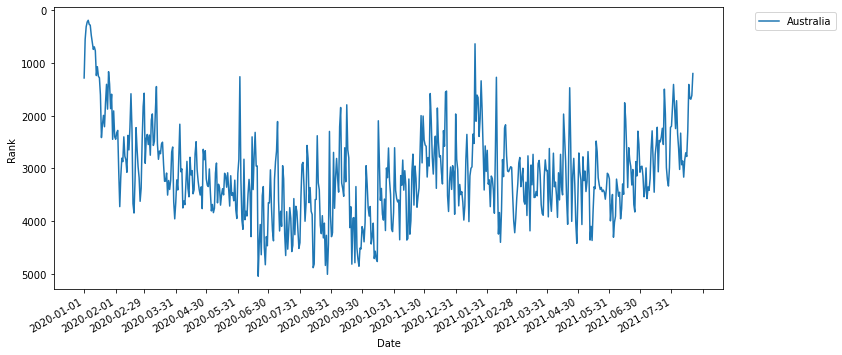

In [58]:
#plotting minutae
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
fig, ax = plt.subplots(figsize=(12, 5.75))

df = q4.set_index('date')
ax.plot(df.index, df['rank'],label = 'Australia')
ax.set_xlabel('Date')
ax.set_ylabel('Rank')

# set ticks to monthly
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# rotate ticks
plt.gcf().autofmt_xdate()
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#ax.set_yscale('log')

This plot looks a bit messy. One thing we can do is implement a rolling average. We can take the mean of a sliding window within the data. This will give us a plot that looks less noisy, but preserves the overall trends.

In [64]:
twitter[['date', 'rank', 'ngram']].rolling(14).median().head(28)

,rank
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [ ]:
fig, ax = plt.subplots(figsize=(12, 5.75))

#plotting minutae
df = df.set_index(pd.DatetimeIndex(df.index))
df = df.rolling('14d').mean()
ax.plot(df.index, df['rank'], label = 'Australia')
ax.set_xlabel('Date')
ax.set_ylabel('Rank')
# set ticks to monthly
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# rotate ticks
plt.gcf().autofmt_xdate()
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#ax.set_yscale('log')

## Question 5

Formulate your own simple research question using **up to five** of the available ngrams.

In [ ]:
    
### Your answer here v

ngrams = ['vaccine', 'anti-vax', 'Pfizer', 'Johnson', 'Moderna', 'covid']
#masks = ['mandate', 'delta', 'masks', 'lockdown', 'tested', 'covid']

q5 = twitter[(twitter['date']>='2020-01-01') & (twitter['ngram'].isin(ngrams))]\
        [['date','ngram','rank']]
### Your answer here ^





#plotting python

def plot_ngrams(df):
    fig, ax = plt.subplots(figsize=(12, 5.75))
    for ngram in set(df['ngram']):
        df_rolling = df[df['ngram']==ngram].set_index('date').rolling(14).mean()
        ax.plot(df_rolling.index, df_rolling['rank'], label = ngram)
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        ax.set_yscale('log')
    plt.gcf().autofmt_xdate()
    plt.gca().invert_yaxis()    
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.set_xlabel('Date')
    ax.set_ylabel('Rank')

#plot_ngrams(countries)

plot_ngrams(q5)


## Question 6

Is there any information shown in the above plots that could help you answer your research question?

Can you think of any possible explanation for the behavior of your chosen ngrams?

Type your answer to q6 in this cell